In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [ ]:
def loss_func(X, Y, beta):
    return cp.norm2(cp.matmul(X, beta) - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_func(X, Y, beta, lamb):
    return loss_func(X, Y, beta) + lamb * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_func(X, Y, beta).value  

In [ ]:
def generate_data(m, n, sigma, density):
    np.random.seed(42)
    beta_star = np.random.randn(n)
    indexs = np.random.choice(n, int((1 - density)*n))
    for index in indexs:
        beta_star[index] = 0
    
    X = np.random.randn(m, n)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size = m)
    return X, Y, beta_star

In [ ]:
m, n, sigma, density = 200, 20, 5, 0.2
X, Y, _ = generate_data(m, n, sigma, density)
X_train = X[:100]
X_test = X[100:]
Y_train = Y[:100]
Y_test = Y[100:]

print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

Size of X_train: (100, 20)
Size of X_test: (100, 20)


In [ ]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg = True)
prob = cp.Problem(cp.Minimize(objective_func(X_train, Y_train, beta, lambd)))

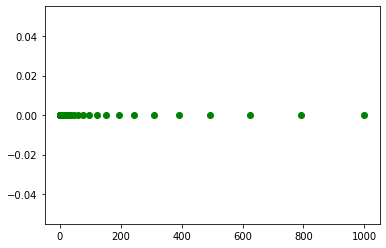

In [ ]:
lambd_value = np.logspace(-2, 3, 50)

y = np.zeros(len(lambd_value))
plt.plot(lambd_value, y, 'o', c = 'g');

In [ ]:
train_err = []
test_err = []
beta_val = []
for lam in lambd_value:
     lambd.value = lam
     prob.solve()
     train_err.append(mse(X_train, Y_train, beta))
     test_err.append(mse(X_test, Y_test, beta))
     beta_val.append(beta.value)

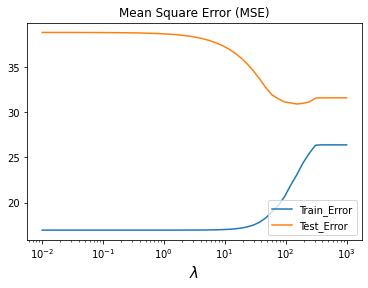

In [ ]:
plt.plot(lambd_value, train_err, label = "Train_Error")
plt.plot(lambd_value, test_err, label = "Test_Error")
plt.legend(loc = "lower right")
plt.xscale("log")
plt.xlabel("$\lambda$", fontsize = 15)
plt.title("Mean Square Error (MSE)");

In [ ]:
def plot_regularization_path(lambda_val, beta_val):
    num_coeffs = len(beta_val[0])
    for i in range(num_coeffs):
        plt.plot(lambd_value, [val[i] for val in beta_val])
    plt.xscale("log")
    plt.xlabel("$\lambda$", fontsize = 15)
    plt.title("Regularization Path");

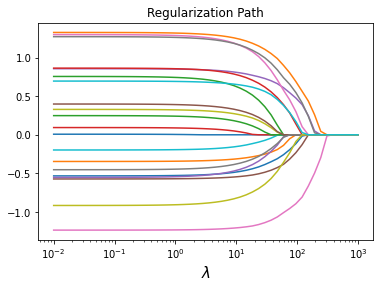

In [ ]:
plot_regularization_path(lambd_value, beta_val)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
boston_data = datasets.load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

[]

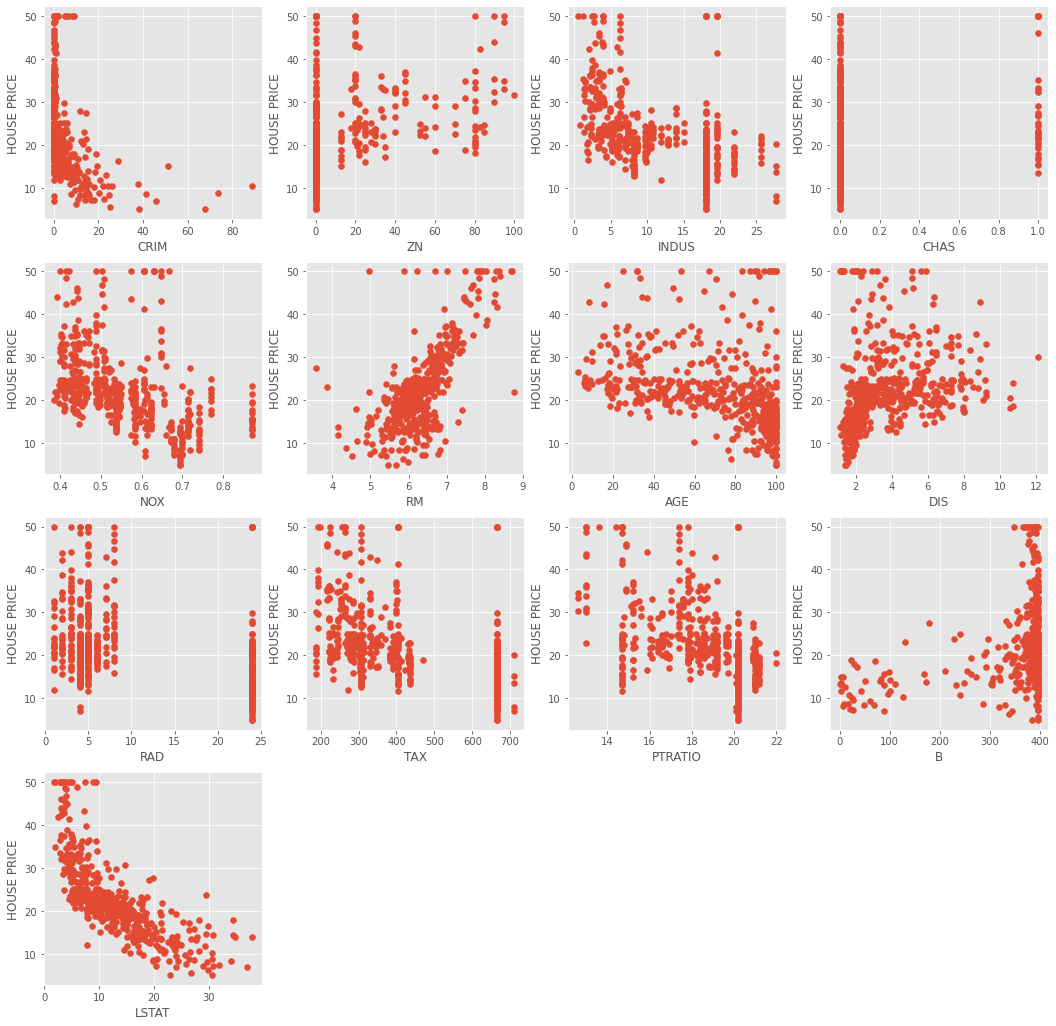

In [15]:
plt.style.use("ggplot")
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(boston_data.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_data.data[:, index], boston_data.target)
    ax.set_ylabel("HOUSE PRICE", size = 12)
    ax.set_xlabel(feature_name, size = 12)
plt.plot()

In [27]:
 #  Pre_processing data
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df["Price"] = pd.Series(boston_data.target)
X_data = boston_df.iloc[:, :-1]
Y_data = boston_df.iloc[:, -1]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


# ***Linear Regression***

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
Y_pred = model.predict(X_test)
MSE = np.mean(np.square(Y_pred - Y_test))
MSE

24.291119474973613

In [43]:
lreg_coeff = pd.DataFrame()
lreg_coeff['Features'] = X_train.columns
lreg_coeff['Coef_Estimate'] = pd.Series(model.coef_)
lreg_coeff

,Features,Coef_Estimate
0,CRIM,-0.113056
1,ZN,0.030110
2,INDUS,0.040381
3,CHAS,2.784438
4,NOX,-17.202633
5,RM,4.438835
6,AGE,-0.006296
7,DIS,-1.447865
8,RAD,0.262430
9,TAX,-0.010647


# ***Lasso Regression***

In [57]:
 from sklearn.linear_model import Lasso
 lasso = Lasso()
 lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
Y_pred2 = lasso.predict(X_test)
MSE = np.mean(np.square(Y_pred2 - Y_test))
MSE

24.409489761299696

In [48]:
lasso_coef = pd.DataFrame()
lasso_coef['Features'] = X_train.columns
lasso_coef['Coef_Estimate'] = lasso.coef_
lasso_coef

,Features,Coef_Estimate
0,CRIM,-0.076609
1,ZN,0.028501
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.630489
6,AGE,0.016395
7,DIS,-0.630858
8,RAD,0.219654
9,TAX,-0.012286


In [46]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

# ***Ridge Regression***

In [50]:
 from sklearn.linear_model import Ridge
 ridge = Ridge()
 ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
Y_pred3 = ridge.predict(X_test)
MSE = np.mean(np.square(Y_pred3 - Y_test))
MSE

24.477191227708662

In [53]:
ridge_coef = pd.DataFrame()
ridge_coef['Features'] = X_train.columns
ridge_coef['Coef_Estimate'] = ridge.coef_
ridge_coef

,Features,Coef_Estimate
0,CRIM,-0.109234
1,ZN,0.032271
2,INDUS,0.007498
3,CHAS,2.545470
4,NOX,-9.537952
5,RM,4.464505
6,AGE,-0.012191
7,DIS,-1.338700
8,RAD,0.248882
9,TAX,-0.011475


# ***Elastic Net Regularization***

In [56]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
Y_pred4 = enet.predict(X_test)
MSE = np.mean(np.square(Y_pred4 - Y_test))
MSE

23.968733210204793

In [60]:
enet_coef = pd.DataFrame()
enet_coef['Features'] = X_train.columns
enet_coef['Enet_Estimate'] = pd.Series(enet.coef_)
enet_coef

,Features,Enet_Estimate
0,CRIM,-0.093299
1,ZN,0.035571
2,INDUS,-0.020130
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.162996
6,AGE,0.018591
7,DIS,-0.755423
8,RAD,0.275980
9,TAX,-0.014273
